# Q.2.

# Importing Libraries

In [1]:
import sklearn
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is A239-1DCD

 Directory of C:\Users\HP\Documents\EXCELR ASSIGNMENTS\Simple Linear Regression Assignment

11-01-2023  00:46    <DIR>          .
11-01-2023  00:46    <DIR>          ..
10-01-2023  14:13    <DIR>          .ipynb_checkpoints
15-11-2022  12:30               218 delivery_time.csv
15-11-2022  12:30               318 Problem_statements.txt
15-11-2022  12:30               454 Salary_Data.csv
11-01-2023  00:46           109,939 SLR Assignment Q.1.Delivery time.ipynb
10-01-2023  16:24           125,160 SLR Assignment Q.2.Salary.ipynb
               5 File(s)        236,089 bytes
               3 Dir(s)  150,579,372,032 bytes free


# Importing Data

In [3]:
Salary_hike= pd.read_csv("Salary_Data.csv")
Salary_hike

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA

In [4]:
Salary_hike.shape

(30, 2)

In [5]:
Salary_hike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
Salary_hike.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
Salary_hike.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [8]:
Salary_hike.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Outlier Detection

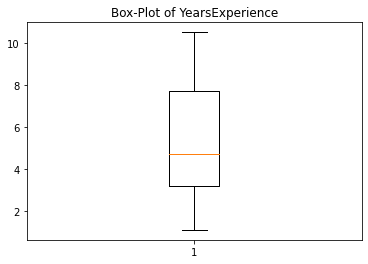

In [9]:
#Box Plot
plt.boxplot(x='YearsExperience',data=Salary_hike)
plt.title("Box-Plot of YearsExperience")
plt.show()

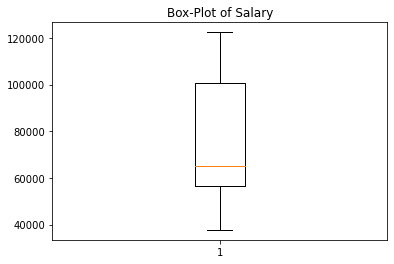

In [10]:
plt.boxplot(x='Salary',data=Salary_hike)
plt.title("Box-Plot of Salary")
plt.show()

# Scatter Plot

<Figure size 360x360 with 0 Axes>

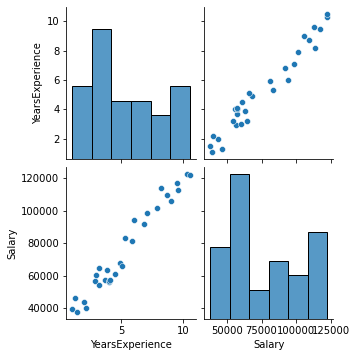

In [11]:
plt.figure(figsize=(5,5))
sns.pairplot(Salary_hike)

# Correlation

In [12]:
Salary_hike.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

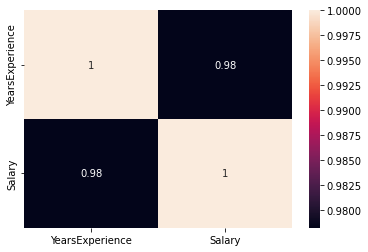

In [13]:
sns.heatmap(Salary_hike.corr(),annot=True)

#Checking Normality

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

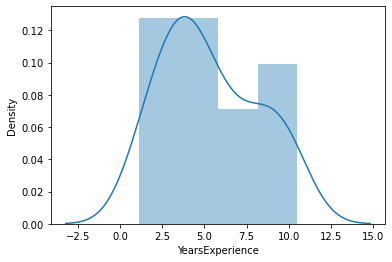

In [14]:
sns.distplot(Salary_hike['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

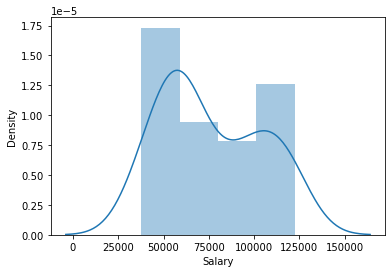

In [15]:
sns.distplot(Salary_hike['Salary'])

# Building Model

In [16]:
first_model = smf.ols("Salary~YearsExperience",data =Salary_hike).fit()

In [17]:
first_model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [18]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        00:48:41   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
first_model.resid

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

In [20]:
first_model.predict()

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

# By using log transformation

In [21]:
second_model=smf.ols("Salary~np.log(YearsExperience)",data=Salary_hike).fit()
second_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           3.25e-13
Time:                        00:48:43   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# By using exp transformation

In [22]:
third_model = smf.ols('Salary~np.exp(YearsExperience)',data=Salary_hike).fit()
third_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     25.07
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           2.72e-05
Time:                        00:48:45   Log-Likelihood:                -339.03
No. Observations:                  30   AIC:                             682.1
Df Residuals:                      28   BIC:                             684.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                6.757e+04   4065.396     16.620      0.000    5.92e+04    7.59e+04
np.exp(YearsExperience)     2.1360      0.427      5.007      0.000       1.262       3.010
==============================================================================
Omnibus:                        4.567   Durbin-Watson:                   0.202
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                1.966
Skew:                           0.276   Prob(JB):                        0.374
Kurtosis:                       1.874   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# By using Sq transformation

In [23]:
Salary_hike["YearsExperience_Sq"] = Salary_hike.Salary**2
fourth_model = smf.ols("np.log(Salary)~YearsExperience+YearsExperience_Sq",data=Salary_hike).fit()
fourth_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     215.1
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           2.58e-17
Time:                        00:48:46   Log-Likelihood:                 30.308
No. Observations:                  30   AIC:                            -54.62
Df Residuals:                      27   BIC:                            -50.41
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.5623      0.045    232.575      0.000      10.469      10.655
YearsExperience        0.0734      0.026      2.783      0.010       0.019       0.128
YearsExperience_Sq  3.409e-11   1.68e-11      2.027      0.053    -4.1e-13    6.86e-11
==============================================================================
Omnibus:                        0.921   Durbin-Watson:                   0.970
Prob(Omnibus):                  0.631   Jarque-Bera (JB):                0.945
Skew:                          -0.344   Prob(JB):                        0.623
Kurtosis:                       2.468   Cond. No.                     2.31e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Selection

#### After comparing the r-square values for the Four models, we can say that the First Model is good for our data because of high value of r-square.